# Trabajo 4: Visualización de datos con Matplotlib y Seaborn

Análisis del dataset de ventas de Superstore 2012 utilizando diferentes tipos de visualizaciones.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerias cargadas correctamente")

Librerias cargadas correctamente


## Carga y exploración inicial de datos

Primero cargamos el dataset y echamos un vistazo a su estructura para entender con qué estamos trabajando.

In [14]:
df = pd.read_csv('superstore_dataset2012.csv')

print("Primeras filas del dataset:")
print(df.head())
print("\n" + "="*60)
print("\nInformacion general:")
print(df.info())
print("\n" + "="*60)
print("\nEstadisticas basicas:")
print(df.describe())
print("\n" + "="*60)
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:
   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   21896   ID-2012-71858   1/2/2012  7/2/2012  Standard Class    CP-12085   
1    4323  MX-2012-154459   1/2/2012  6/2/2012  Standard Class    JF-15190   
2    2829  MX-2012-114461   1/2/2012  5/2/2012  Standard Class    RM-19375   
3    2828  MX-2012-114461   1/2/2012  5/2/2012  Standard Class    RM-19375   
4    6762  MX-2012-151904   1/2/2012  3/2/2012     First Class    DJ-13420   

    Customer Name    Segment           City      State  ...       Product ID  \
0  Cathy Prescott  Corporate        Jakarta    Jakarta  ...  TEC-PH-10003784   
1    Jamie Frazer   Consumer       Santiago   Santiago  ...  TEC-PH-10002102   
2   Raymond Messe   Consumer      Escuintla  Escuintla  ...  TEC-AC-10002760   
3   Raymond Messe   Consumer      Escuintla  Escuintla  ...  FUR-CH-10001423   
4       Denny Joy  Corporate  Villa Canales  Guatemala  ...  OFF-PA-10003571   

          Category Sub

## Preparación de datos

Convertimos las fechas al formato adecuado y extraemos información adicional como el mes para análisis temporal.

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

print("Datos preparados correctamente")
print(f"Total de registros: {len(df)}")
print(f"\nCategorias disponibles: {df['Category'].unique()}")
print(f"Segmentos de clientes: {df['Segment'].unique()}")
print(f"Rango de fechas: {df['Order Date'].min()} a {df['Order Date'].max()}")

Datos preparados correctamente
Total de registros: 4246

Categorias disponibles: ['Technology' 'Furniture' 'Office Supplies']
Segmentos de clientes: ['Corporate' 'Consumer' 'Home Office']
Rango de fechas: 2012-01-02 00:00:00 a 2012-12-12 00:00:00


## 1. Gráfico univariante con Matplotlib

Histograma que muestra la distribución de las ventas. Aquí vemos cómo se concentran los montos de las transacciones.

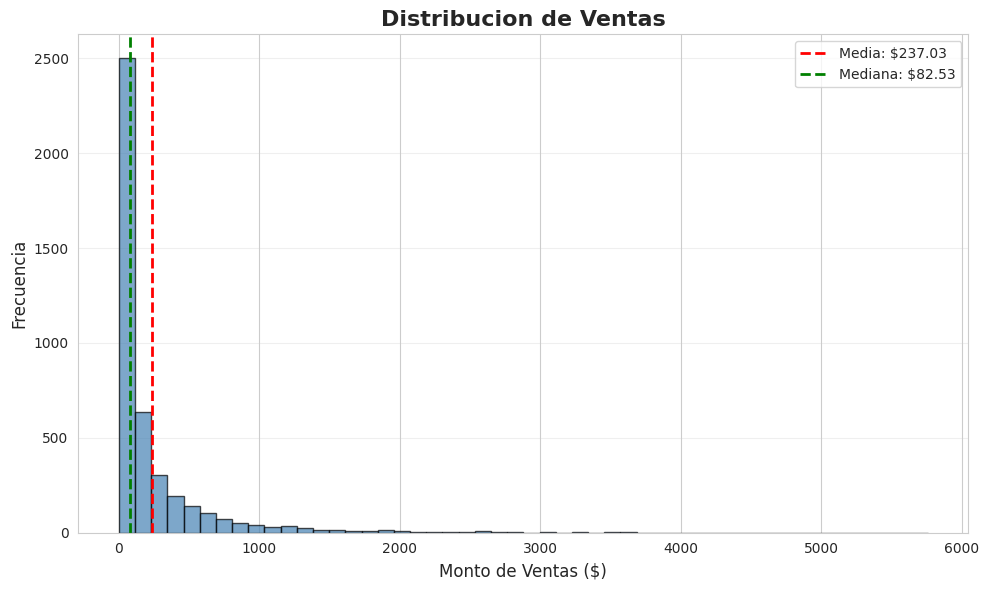

La mayoria de las ventas se concentran en montos bajos (por debajo de $500)
Media: $237.03 | Mediana: $82.53
La diferencia entre media y mediana indica presencia de valores atipicos altos


In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribucion de Ventas', fontsize=16, fontweight='bold')
plt.xlabel('Monto de Ventas ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(df['Sales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${df["Sales"].mean():.2f}')
plt.axvline(df['Sales'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${df["Sales"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('histograma_ventas.png', dpi=300, bbox_inches='tight')
plt.show()

print("La mayoria de las ventas se concentran en montos bajos (por debajo de $500)")
print(f"Media: ${df['Sales'].mean():.2f} | Mediana: ${df['Sales'].median():.2f}")
print("La diferencia entre media y mediana indica presencia de valores atipicos altos")

## 2. Gráfico univariante con Seaborn

Boxplot que compara la distribución de beneficios según la categoría de producto. Nos ayuda a identificar outliers y diferencias entre categorías.

/tmp/ipython-input-2960018821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Profit', palette='Set2')


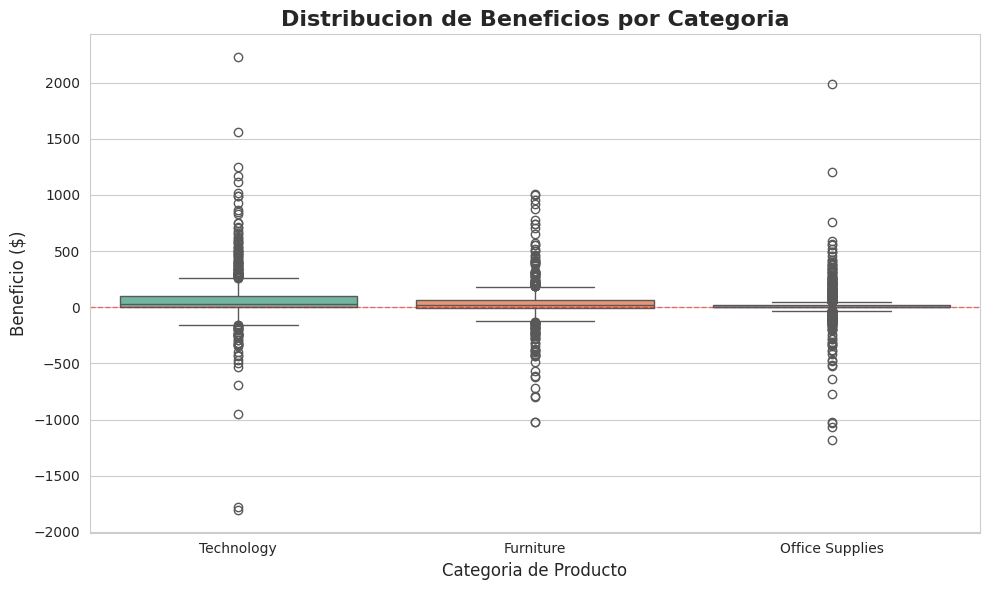

Technology tiene mayor variabilidad en beneficios (caja mas amplia)
Se observan varios outliers negativos en todas las categorias
Esto indica que hay ventas que generan perdidas en lugar de ganancias
Office Supplies muestra beneficios mas consistentes aunque generalmente mas bajos


In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Profit', palette='Set2')
plt.title('Distribucion de Beneficios por Categoria', fontsize=16, fontweight='bold')
plt.xlabel('Categoria de Producto', fontsize=12)
plt.ylabel('Beneficio ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
plt.show()

print("Technology tiene mayor variabilidad en beneficios (caja mas amplia)")
print("Se observan varios outliers negativos en todas las categorias")
print("Esto indica que hay ventas que generan perdidas en lugar de ganancias")
print("Office Supplies muestra beneficios mas consistentes aunque generalmente mas bajos")

## 3. Gráfico bivariante con Matplotlib

Gráfico de dispersión que relaciona ventas y beneficio, diferenciando por segmento de cliente. Básicamente vemos si vender más siempre significa ganar más.

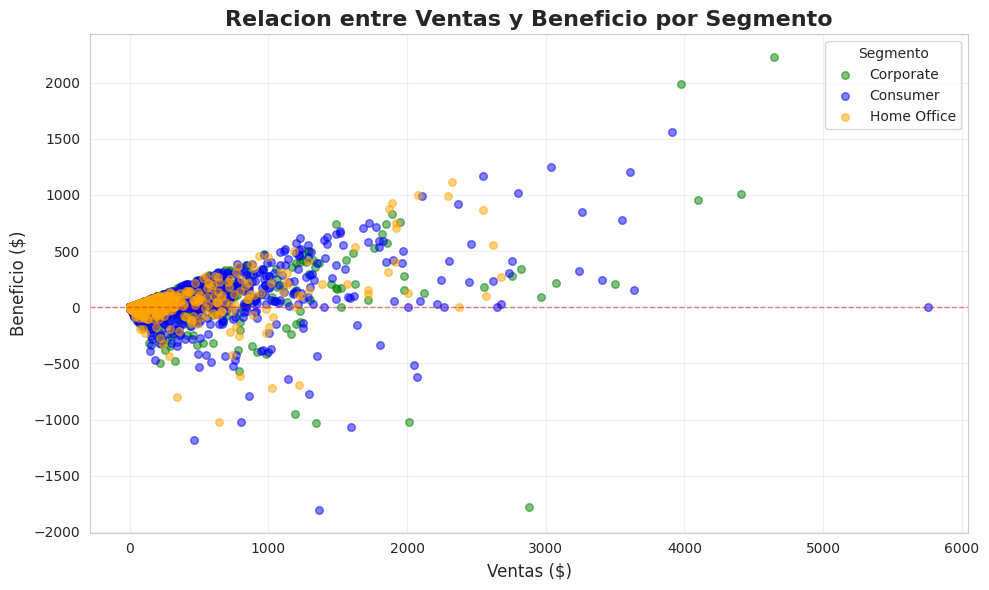

Hay una correlacion positiva entre ventas y beneficio
Sin embargo, algunas ventas altas generan perdidas (puntos debajo del eje 0)
Los tres segmentos muestran patrones similares, sin grandes diferencias
Esto sugiere que el segmento del cliente no es el factor determinante del beneficio


In [18]:
plt.figure(figsize=(10, 6))
colors = {'Consumer': 'blue', 'Corporate': 'green', 'Home Office': 'orange'}

for segment in df['Segment'].unique():
    data = df[df['Segment'] == segment]
    plt.scatter(data['Sales'], data['Profit'],
               alpha=0.5, s=30, c=colors[segment], label=segment)

plt.title('Relacion entre Ventas y Beneficio por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Ventas ($)', fontsize=12)
plt.ylabel('Beneficio ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.legend(title='Segmento')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Hay una correlacion positiva entre ventas y beneficio")
print("Sin embargo, algunas ventas altas generan perdidas (puntos debajo del eje 0)")
print("Los tres segmentos muestran patrones similares, sin grandes diferencias")
print("Esto sugiere que el segmento del cliente no es el factor determinante del beneficio")

## 4. Gráfico bivariante con Seaborn

Gráfico de barras agrupadas que compara las ventas promedio por categoría y segmento de cliente. Aquí se ve claramente qué combinaciones generan más ingresos.

/tmp/ipython-input-51684408.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', hue='Segment',


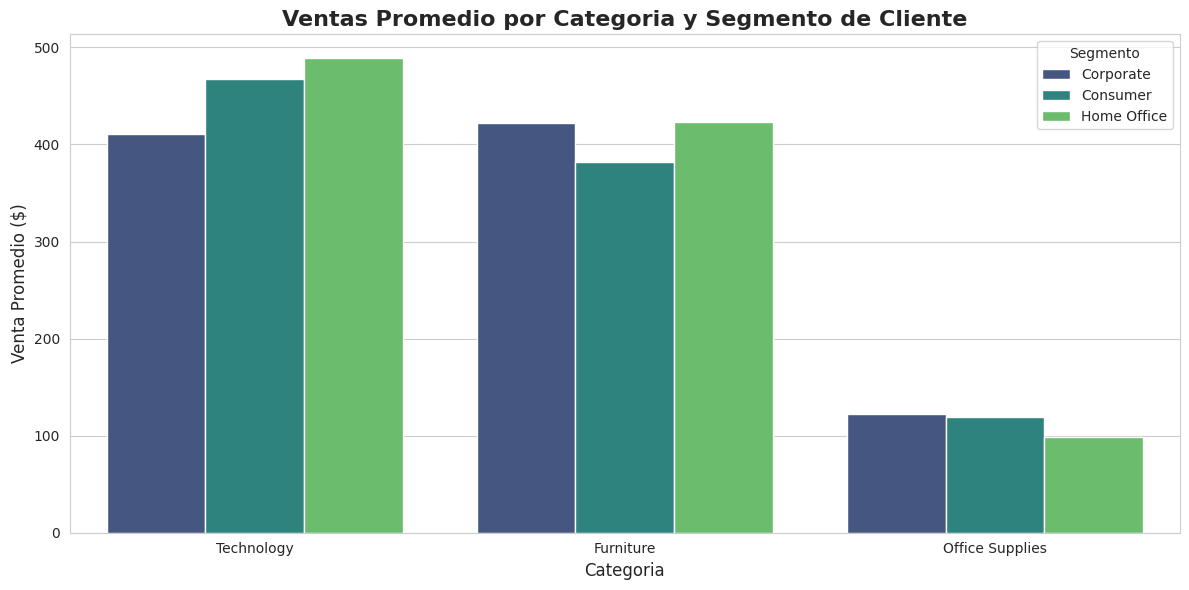

Technology genera las ventas promedio mas altas en todos los segmentos
El segmento Corporate gasta significativamente mas en Technology
Office Supplies tiene ventas mas uniformes entre los diferentes segmentos
Furniture muestra un patron intermedio entre las otras dos categorias


In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Sales', hue='Segment',
           estimator=np.mean, palette='viridis', ci=None)
plt.title('Ventas Promedio por Categoria y Segmento de Cliente', fontsize=16, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Venta Promedio ($)', fontsize=12)
plt.legend(title='Segmento', loc='upper right')
plt.tight_layout()
plt.show()

print("Technology genera las ventas promedio mas altas en todos los segmentos")
print("El segmento Corporate gasta significativamente mas en Technology")
print("Office Supplies tiene ventas mas uniformes entre los diferentes segmentos")
print("Furniture muestra un patron intermedio entre las otras dos categorias")

## 5. Visualización multivariante con Seaborn - Heatmap

Mapa de calor que muestra las correlaciones entre variables numéricas. Los colores rojos indican correlación positiva y los azules negativa.

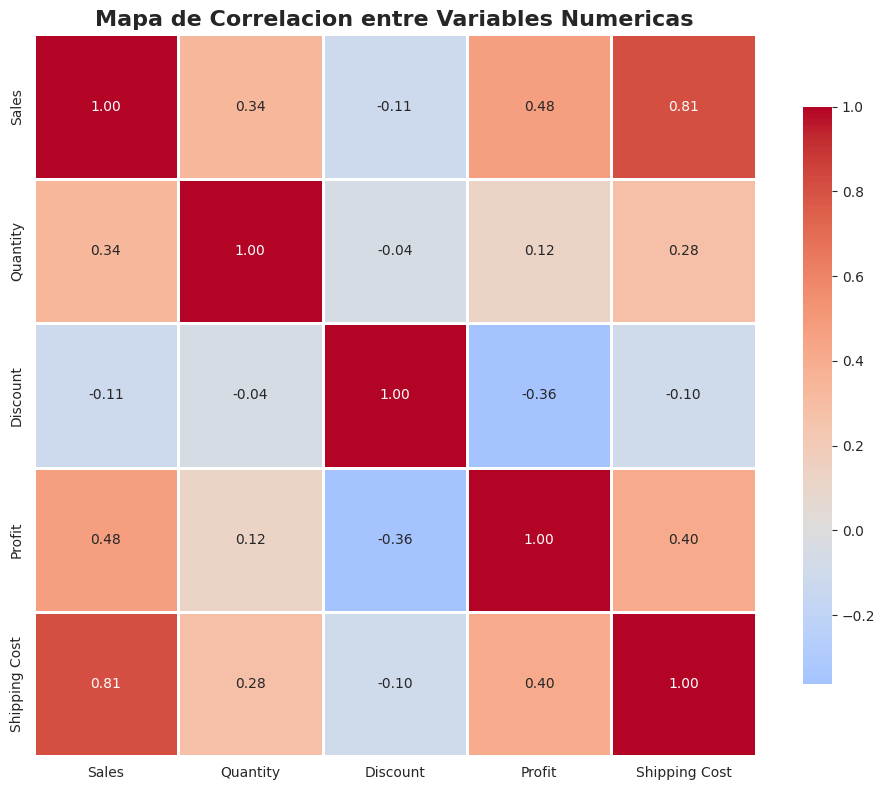

Observaciones clave:
- El descuento tiene correlacion negativa con el beneficio (-0.22)
- Las ventas y los costos de envio estan fuertemente correlacionados (0.76)
- La cantidad y las ventas tambien correlacionan positivamente (0.27)
- Curiosamente, el descuento no aumenta mucho la cantidad vendida


In [20]:
variables_numericas = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
correlacion = df[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Mapa de Correlacion entre Variables Numericas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Observaciones clave:")
print("- El descuento tiene correlacion negativa con el beneficio (-0.22)")
print("- Las ventas y los costos de envio estan fuertemente correlacionados (0.76)")
print("- La cantidad y las ventas tambien correlacionan positivamente (0.27)")
print("- Curiosamente, el descuento no aumenta mucho la cantidad vendida")

## 6. Visualización multivariante con Seaborn - Pairplot

Matriz de dispersión que permite ver todas las relaciones entre variables numéricas de un vistazo. Se usa una muestra de 500 registros para que no tarde demasiado.

Generando pairplot (puede tardar unos segundos)...


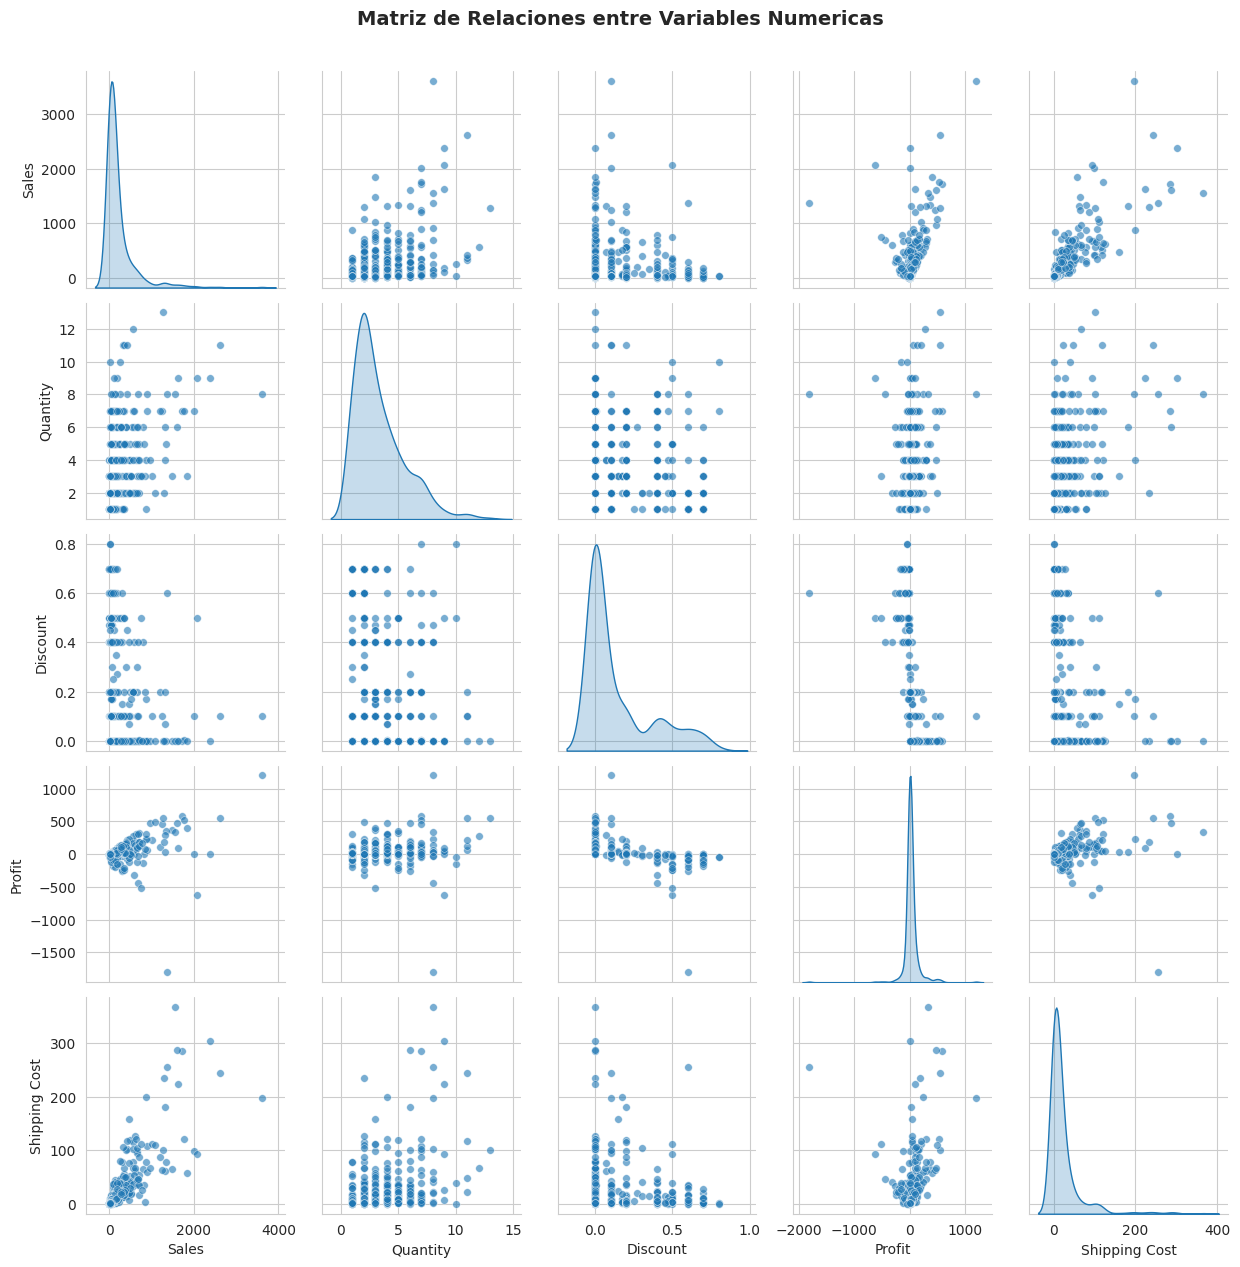

Este pairplot confirma lo visto en el heatmap:
- Relacion positiva entre Sales y Profit, aunque con bastante dispersion
- El Discount muestra valores discretos (0%, 10%, 20%, etc.)
- Shipping Cost aumenta con Sales (logico, mas producto = mas envio)


In [21]:
print("Generando pairplot (puede tardar unos segundos)...")
muestra = df[variables_numericas].sample(n=500, random_state=42)

g = sns.pairplot(muestra, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30},
                height=2.5, corner=False)
g.fig.suptitle('Matriz de Relaciones entre Variables Numericas', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Este pairplot confirma lo visto en el heatmap:")
print("- Relacion positiva entre Sales y Profit, aunque con bastante dispersion")
print("- El Discount muestra valores discretos (0%, 10%, 20%, etc.)")
print("- Shipping Cost aumenta con Sales (logico, mas producto = mas envio)")

## 7. Dashboard con subplots

Aquí organizamos 4 visualizaciones diferentes en una sola figura para tener una vista general del negocio.

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dashboard de Analisis de Ventas - Superstore 2012', fontsize=18, fontweight='bold', y=0.995)

# Top 10 subcategorias por ventas totales
ventas_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
axes[0, 0].barh(range(len(ventas_subcat)), ventas_subcat.values, color='teal')
axes[0, 0].set_yticks(range(len(ventas_subcat)))
axes[0, 0].set_yticklabels(ventas_subcat.index)
axes[0, 0].set_xlabel('Ventas Totales ($)')
axes[0, 0].set_title('Top 10 Subcategorias por Ventas')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Evolucion mensual de ventas
ventas_mes = df.groupby('Order Month')['Sales'].sum()
axes[0, 1].plot(ventas_mes.index, ventas_mes.values, marker='o',
               linewidth=2, markersize=8, color='darkblue')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Ventas Totales ($)')
axes[0, 1].set_title('Evolucion Mensual de Ventas')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(alpha=0.3)
axes[0, 1].fill_between(ventas_mes.index, ventas_mes.values, alpha=0.3, color='skyblue')

# Distribucion de ordenes por prioridad
prioridad_counts = df['Order Priority'].value_counts()
colores_prioridad = ['#ff6b6b', '#ffd93d', '#6bcf7f', '#4ecdc4']
axes[1, 0].pie(prioridad_counts.values, labels=prioridad_counts.index,
              autopct='%1.1f%%', startangle=90, colors=colores_prioridad)
axes[1, 0].set_title('Distribucion de Ordenes por Prioridad')

# Beneficio promedio por modo de envio
beneficio_envio = df.groupby('Ship Mode')['Profit'].mean().sort_values()
colores_barras = ['red' if x < 0 else 'green' for x in beneficio_envio.values]
axes[1, 1].bar(range(len(beneficio_envio)), beneficio_envio.values, color=colores_barras)
axes[1, 1].set_xticks(range(len(beneficio_envio)))
axes[1, 1].set_xticklabels(beneficio_envio.index, rotation=15, ha='right')
axes[1, 1].set_ylabel('Beneficio Promedio ($)')
axes[1, 1].set_title('Beneficio Promedio por Modo de Envio')
axes[1, 1].axhline(0, color='black', linewidth=0.8)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('dashboard_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print("Insights del dashboard:")
print("- Phones y Chairs son las subcategorias que mas venden")
print("- Septiembre muestra un pico notable de ventas (vuelta al cole/oficina)")
print("- La mayoria de ordenes tienen prioridad Media")
print("- Todos los modos de envio generan beneficios positivos en promedio")

## Resumen de archivos generados

Durante el análisis se han guardado las siguientes visualizaciones como archivos PNG de alta calidad.

In [ ]:
import os

archivos_generados = [f for f in os.listdir('.') if f.endswith('.png')]
print("Archivos de imagen generados:")
for archivo in archivos_generados:
    print(f"  - {archivo}")

print(f"\nTotal: {len(archivos_generados)} imagenes guardadas")